In [ ]:
# Code for the Book: International Stock Picking A.I. INVESTOR: A Guide to Build.
# Website: ai-investor.net
# Code needs am "All-In-One" subscription from the (presumably) nice people at https://eodhistoricaldata.com/. 
# Check the book text to see if they have changed their service since mid-2021.

# Damon Lee 2021

# Feel free to fork this code for others to see what can be done with it.

In [ ]:
myToken = 'ABC123zyx.XXXXXXXXXX' # put own token from eodhistoricaldata.com here

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Set the plotting DPI settings to be a bit higher.
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [7.0, 4.5]
plt.rcParams['figure.dpi'] = 150

# Get Stock Price Series For One Company

In [3]:
import pandas as pd
import requests
from io import StringIO # read string as file for pandas
import os

def get_eod_data(startDate, endDate, symbol='AAPL.US', api_token='OeAFFmMliFG5orCUuwAKQ8l4WWFQ67YX', session=None):
    '''
    Gets price series data between startDate and endDate.
    Can set endDate to the future for up to date price series.
    Does not raise exception if there is an error, instead writes to StockWithIssues.txt.
    Returns a DataFrame where Date is NOT the index col.
    '''
    if session is None:
        session = requests.Session()
    url = 'https://eodhistoricaldata.com/api/eod/%s' % symbol
    params = {'api_token': api_token, 'from':startDate, 'to':endDate}
    r = session.get(url, params=params)
    if r.status_code == requests.codes.ok:
        df = pd.read_csv(StringIO(r.text), skipfooter=1, parse_dates=[0], engine='python')# index_col=0
        return df
    else:
        with open("StockWithIssues.txt", "a") as myfile:
            myfile.write(symbol+' '+str(r.status_code)+' '+str(r.reason)+' '+str(url)+'\n')
            myfile.close()
        return pd.DataFrame()

In [4]:
priceSeries = get_eod_data('1970-01-01', '2022-12-30', symbol='N225.INDX', api_token=myToken)
priceSeries.index = priceSeries['Date']
priceSeries.head()

,Date,Open,High,Low,Close,Adjusted_close,Volume
Date,,,,,,,
1970-01-05,1970-01-05,2402.85,2402.85,2402.85,2402.85,2402.85,0
1970-01-06,1970-01-06,2406.22,2406.22,2406.22,2406.22,2406.22,0
1970-01-07,1970-01-07,2394.96,2394.96,2394.96,2394.96,2394.96,0
1970-01-08,1970-01-08,2283.68,2283.68,2283.68,2283.68,2283.68,0
1970-01-09,1970-01-09,2283.68,2283.68,2283.68,2283.68,2283.68,0


Text(0, 0.5, 'Nikkei 225')

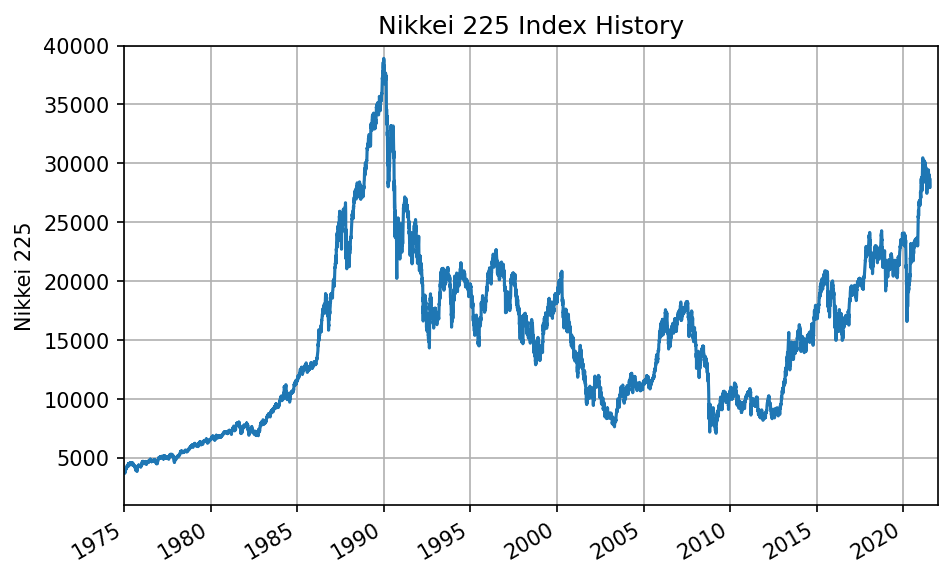

In [5]:
from matplotlib import pyplot as plt

#priceSeries.index = priceSeries['Date']
#plt.figure(figsize = (15,7))
priceSeries['Adjusted_close'].plot(grid=True)
plt.title('Nikkei 225 Index History')
plt.xlim(['1975','2022'])
plt.ylim([1000,40000])
plt.xlabel('')
plt.ylabel('Nikkei 225')